<a href="https://colab.research.google.com/github/MariaChuquitarco/014MBID/blob/main/TFM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proceso KDD


## 1. Importación de librerías


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from PIL import Image


## 2. Carga del dataset

Los data set fueron obtenidos desde: <https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/>



In [ ]:
base_personas= pd.read_csv("/content/BDD_ENDI_R1_f1_personas_Trabajada.csv", delimiter=';')
base_hogar = pd.read_csv("/content/BDD_ENDI_R1_f1_hogar.csv", delimiter=';')
base_lactancia = pd.read_csv("/content/BDD_ENDI_R1_f2_lactancia.csv", delimiter=';')
base_mef = pd.read_csv("/content/BDD_ENDI_R1_f2_mef.csv", delimiter=';')
base_salud_ninez = pd.read_csv("/content/BDD_ENDI_R1_f2_salud_ninez.csv", delimiter=';')

<ipython-input-2-ffb3e88a41db>:1: DtypeWarning: Columns (17,99) have mixed types. Specify dtype option on import or set low_memory=False.
  base_personas= pd.read_csv("/content/BDD_ENDI_R1_f1_personas_Trabajada.csv", delimiter=';')
<ipython-input-2-ffb3e88a41db>:4: DtypeWarning: Columns (71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  base_mef = pd.read_csv("/content/BDD_ENDI_R1_f2_mef.csv", delimiter=';')
<ipython-input-2-ffb3e88a41db>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  base_salud_ninez = pd.read_csv("/content/BDD_ENDI_R1_f2_salud_ninez.csv", delimiter=';')


A continunación el primer filtro teniendo en cuenta el criterio de  clasificación proporcionada por el Fondo de las Naciones Unidas para la Infancia (UNICEF)

In [ ]:
columnas_personas= ['id_viv','edaddias','area','region','prov','parr_pri','etnia',
                    'f1_s1_2','f1_s1_11','f1_s1_12','f1_s5_4_1','f1_s5_4_2',
                    'f1_s5_5_1','f1_s5_5_2','f1_s5_6_1','f1_s5_6_2','f1_s5_6_3','f1_s6_3','dcronica']
columnas_hogar=['id_viv','f1_s3_3','f1_s3_5','f1_s3_7','f1_s3_9','f1_s3_11','f1_s3_12','f1_s3_20','f1_s3_28','f1_s4_1_6',
                'f1_s7_1','f1_s7_4','f1_s7_23']
columnas_lactancia=['id_viv','f2_s3_302','f2_s3_304','f2_s3_307_2','f2_s3_310_a_1','f2_s3_310_b_2',
                     'f2_s3_310_c_2','f2_s3_310_d_1','f2_s3_310_e_1','f2_s3_310_f_1','f2_s3_311','f2_s3_312_a','f2_s3_312_b','f2_s3_312_c',
                     'f2_s3_312_d','f2_s3_312_e','f2_s3_312_f','f2_s3_312_g','f2_s3_312_h','f2_s3_312_i','f2_s3_312_j','f2_s3_312_k',
                      'f2_s3_312_l','f2_s3_312_m','f2_s3_312_n','f2_s3_312_o','f2_s3_312_p','f2_s3_312_q','f2_s3_312_r','f2_s3_312_s',
                      'f2_s3_312_t','f2_s3_312_u','f2_s3_313','f2_s3_314','f2_s3_315','f2_s3_316','f2_s3_318','f2_s3_320','f2_s3_321','f2_s3_323']
columnas_mef=['id_viv','f2_s1_101','f2_s2_227_3','f2_s2_228_1','f2_s2_233_1','f2_s2_233_2','f2_s2_233_4']
columnas_salud_ninez=['id_viv','area','ord_hijo','f2_s4a_402','f2_s4b_404','f2_s4b_406','f2_s4b_409_a','f2_s4b_410_a','f2_s4b_411_a',
                      'f2_s4b_414','f2_s4b_415','f2_s4b_416','f2_s4b_417','f2_s4b_418_a','f2_s4b_419_a','f2_s4b_420_a','f2_s4b_421_a','f2_s4b_422_a',
                      'f2_s4b_423_a','f2_s4b_424_a','f2_s4b_425_a','f2_s4b_426_a','f2_s4b_427','f2_s4b_428a_1','f2_s4b_428a_2','f2_s4b_428a_3','f2_s4b_428a_4',
                      'f2_s4b_428a_5','f2_s4b_428b_6','f2_s4b_428a_7','f2_s4b_428a_8','f2_s4b_428a_9','f2_s4b_428a_10','f2_s4c_431','f2_s4d_436','f2_s4e_448_a',
                      'f2_s4e_448_b','f2_s4e_448_c']

personas_filtrado = base_personas[columnas_personas]
hogar_filtrado = base_hogar[columnas_hogar]
lactancia_filtrado = base_lactancia[columnas_lactancia]
mef_filtrado = base_mef[columnas_mef]
salud_ninez_filtrado = base_salud_ninez[columnas_salud_ninez]


Para una mejor comprensión se cambiara de nombre a las variables dandole nombres estrategicos

In [ ]:
# Asignar nuevos nombres a todas las columnas
personas_filtrado.columns = ['id_viv','edaddias','area','region','prov','parr_pri','etnia'
                              ,'sexo','padre_hogar','madre_hogar','peso_1','peso_2',
                    'long_1','long_2','talla_1','talla_2','talla_3','hemoglobina','dcronica']
hogar_filtrado.columns=['id_viv','material_techo','material_paredes','material_piso','tipo_agua','servicio_higenico','dispone_luz_red_publica','cocina_mediante','existe_agua','quedo_sin_alimentos',
                'agua_proviene','ultimas_2_semanas_cantidades_necesarias','agua_que_beben']

lactancia_filtrado.columns=['id_viv','dio_ceno_al_nacer','tiempo_despues_empezo_a_lactar','dias_solo_pecho','tomo_agua_pura_ayer','ayer_cuantos_tarros_de_leche',
                     'ayer_duantas_fundas_de_leche','ayer_tomo_jugos','ayer_comio_sopa','ayer_tomo_otro_liquido','ayer_comio_alimento_solido','ayer_comio_colada_espesa','ayer_comio_pure','ayer_comio_zapallo',
                     'ayer_comio_papa','ayer_comio_cualquier_vegetal','ayer_comio_maduro','ayer_comio_cualquier_fruta','ayer_comio_higado','ayer_comio_cualquier_carne','ayer_comio_huevos','ayer_comio_pescado',
                      'ayer_comio_cualquier semilla','ayer_comio_lacteo','ayer_comio_alimentos_preparados_manteca_cerdo','ayer_comio_dulce','ayer_comio_alimentos_preparados_condimentos','ayer_comio_alimentos_aceite_vegetal','ayer_comio_alimentos_preparados_aceite_vegetal','ayer_comio_alimentos_sal',
                      'ayer_comio_alimentos_dulce','otros_alimentos','cuantas_veces_comio_solido','tomo_liquido_en_biceron','cuantos_biberones','liquido_que_toma','recibio_dos_tomas_de_leche','respetan_permiso_lactancia','respetan_licencia_maternidad','permiten_sala_lactancia']
mef_filtrado.columns=['id_viv','años cumplidos','hijos_vivos_que_murieron','cuantos_hijos_fallecieron_5meses','total_hijos_viven_casa','total_hijos_fuera_casa','suma_hijos_vivos']

salud_ninez_filtrado.columns=['id_viv','area','ord_hijo','esta_vivo','tuvo_control_penatral','controles_antes_parto','consumo_acido_folico_durante_embarazo','consumo_hierro_durante_embarazo','consumo micronutrirntes_durante_embarazo',
                      'toma_presión_durante_embarazo','examen_VIH_antes_20semanas','examen_VIH_a_partir_20semanas','examen_VIH_durante_embarazo','examen_anemia_antes_20semanas','examen_anemia_a_oartir_20semanas','examen_orina__antes_20semanas','examen_orina_a_partir_20semanas','examen_TORCHs_antes_20semanas',
                      'examen_TORCHs_a_partir_20semanas','vacuna_tetanos_y_difteria','vacuna_influencia','ecos_obstetricos','recibio_charla_durante_embarazo','recibio_charla_sobre_lactancia','recibio_charla_consumo_micronutrientes','recibio_charla_alarma_embarazo','recibio_charla_preparacion_alimentos',
                      'recibio_charla_lavado_de_manos','cuantos_nacidos_vivos','recibio_consejeria_apego_lactancia','recibio_charla_alimentacion_saludable','recibio_charla_planificacion_transporte','recibio_charla_agua_segura','tipo_parto','primera_hora_leche_materna','primer_control_postarto_dias',
                      'primer_control_postarto_semanas','primer_control_postarto_meses']

Se unen las bases

In [ ]:
personas_filtrado['id_viv'] = personas_filtrado['id_viv'].astype(str)
hogar_filtrado['id_viv'] = hogar_filtrado['id_viv'].astype(str)
mef_filtrado['id_viv'] = mef_filtrado['id_viv'].astype(str)
salud_ninez_filtrado['id_viv'] = salud_ninez_filtrado['id_viv'].astype(str)
# Unir personas y hogar
personas_hogar = personas_filtrado.merge(hogar_filtrado, on='id_viv', how='inner')

# Unir el resultado anterior con lactancia
personas_hogar_lactancia = personas_hogar.merge(lactancia_filtrado, on='id_viv', how='inner')

# Unir el resultado con mef
personas_hogar_lactancia_mef = personas_hogar_lactancia.merge(mef_filtrado, on='id_viv', how='inner')

# Finalmente, unir con salud_ninez
base_general = personas_hogar_lactancia_mef.merge(salud_ninez_filtrado, on='id_viv', how='inner')


<ipython-input-5-7eadf8a925f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personas_filtrado['id_viv'] = personas_filtrado['id_viv'].astype(str)
<ipython-input-5-7eadf8a925f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hogar_filtrado['id_viv'] = hogar_filtrado['id_viv'].astype(str)
<ipython-input-5-7eadf8a925f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Filtrar solo a los niños menores o igual a 5 años

In [ ]:
# Reemplazar puntos (.) por NaN en todo el DataFrame
base_general.replace('.', np.nan, inplace=True)

In [ ]:
# Definir el rango de días para niños de 5 años o menos
base_general['edaddias'] = pd.to_numeric(base_general['edaddias'])
dias_max = 1825  # 5 años
# Filtrar el DataFrame para incluir solo a los niños de 5 años o menos
base_general = base_general[base_general['edaddias'] <= dias_max]
# Guardar el DataFrame en un archivo Excel
base_general.to_excel('base_general_ninos_menores_5_anios.xlsx', index=False)

In [ ]:
# Obtener la cantidad de columnas y filas
cantidad_columnas = base_general.shape[1]  # Número de columnas
cantidad_registros = base_general.shape[0]  # Número de filas

# Imprimir la cantidad de columnas y registros
print(f'Cantidad de columnas: {cantidad_columnas}')
print(f'Cantidad de registros: {cantidad_registros}')


Cantidad de columnas: 113
Cantidad de registros: 10154


### Exploratorio de datos

#### 1. Resumen Estadístico de la Variable dcronica

In [ ]:
# Supongamos que base_general es tu DataFrame original
# Reemplazar valores nulos en las columnas categóricas por 'Desconocido'
categorical_cols = ['area_x','area_y', 'region', 'prov', 'parr_pri', 'etnia', 'sexo', 'padre_hogar', 'madre_hogar','material_techo', 'material_paredes','tiempo_despues_empezo_a_lactar',
 'material_piso', 'tipo_agua', 'servicio_higenico', 'dispone_luz_red_publica', 'cocina_mediante', 'existe_agua', 'quedo_sin_alimentos',
  'agua_proviene', 'ultimas_2_semanas_cantidades_necesarias', 'agua_que_beben', 'dio_ceno_al_nacer',
   'tomo_agua_pura_ayer','ayer_tomo_jugos', 'ayer_comio_sopa', 'ayer_tomo_otro_liquido', 'ayer_comio_alimento_solido', 'ayer_comio_colada_espesa', 'ayer_comio_pure',
     'ayer_comio_zapallo', 'ayer_comio_papa', 'ayer_comio_cualquier_vegetal', 'ayer_comio_maduro', 'ayer_comio_cualquier_fruta', 'ayer_comio_higado',
      'ayer_comio_cualquier_carne', 'ayer_comio_huevos', 'ayer_comio_pescado', 'ayer_comio_cualquier semilla', 'ayer_comio_lacteo',
       'ayer_comio_alimentos_preparados_manteca_cerdo', 'ayer_comio_dulce', 'ayer_comio_alimentos_preparados_condimentos', 'ayer_comio_alimentos_aceite_vegetal',
       'ayer_comio_alimentos_preparados_aceite_vegetal', 'ayer_comio_alimentos_sal', 'ayer_comio_alimentos_dulce', 'otros_alimentos',
        'tomo_liquido_en_biceron',  'liquido_que_toma', 'recibio_dos_tomas_de_leche', 'respetan_permiso_lactancia', 'respetan_licencia_maternidad',
         'permiten_sala_lactancia', 'esta_vivo', 'tuvo_control_penatral',
          'consumo_acido_folico_durante_embarazo', 'consumo_hierro_durante_embarazo', 'consumo micronutrirntes_durante_embarazo', 'toma_presión_durante_embarazo',
          'examen_VIH_antes_20semanas', 'examen_VIH_a_partir_20semanas', 'examen_VIH_durante_embarazo', 'examen_anemia_antes_20semanas', 'examen_anemia_a_oartir_20semanas',
          'examen_orina__antes_20semanas', 'examen_orina_a_partir_20semanas', 'examen_TORCHs_antes_20semanas', 'examen_TORCHs_a_partir_20semanas', 'vacuna_tetanos_y_difteria',
           'vacuna_influencia', 'ecos_obstetricos', 'recibio_charla_durante_embarazo', 'recibio_charla_sobre_lactancia', 'recibio_charla_consumo_micronutrientes',
           'recibio_charla_alarma_embarazo', 'recibio_charla_preparacion_alimentos', 'recibio_charla_lavado_de_manos', 'recibio_consejeria_apego_lactancia',
            'recibio_charla_alimentacion_saludable', 'recibio_charla_planificacion_transporte', 'recibio_charla_agua_segura', 'tipo_parto','primera_hora_leche_materna']

# Reemplazar valores nulos en las columnas categóricas por 'Desconocido'
base_general[categorical_cols] = base_general[categorical_cols].fillna('Desconocido')

In [ ]:
# Ver cuántos niños tienen o no desnutrición crónica
print(base_general['dcronica'].value_counts())
# Proporciones de desnutrición crónica
print(base_general['dcronica'].value_counts(normalize=True) * 100)


dcronica
0    7764
1    2115
Name: count, dtype: int64
dcronica
0    78.590951
1    21.409049
Name: proportion, dtype: float64


#### 2. Gráficos para Visualizar la Distribución de dcronica

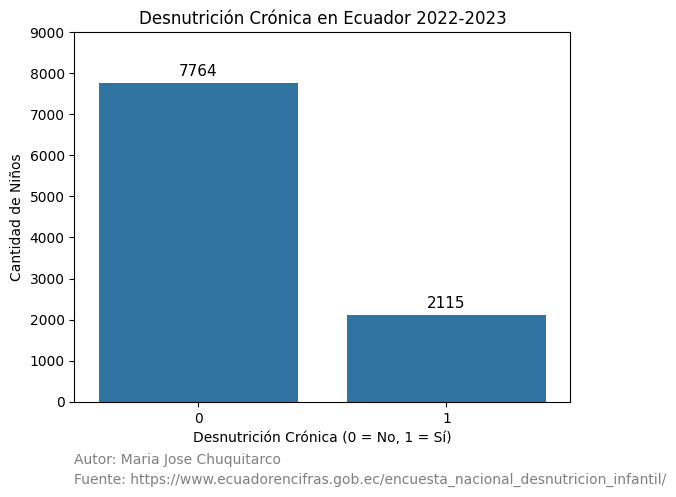

In [ ]:
# Gráfico de barras de la variable dcronica
sns.countplot(x='dcronica', data=base_general)

# Añadir título y etiquetas a los ejes
plt.title('Desnutrición Crónica en Ecuador 2022-2023')
plt.xlabel('Desnutrición Crónica (0 = No, 1 = Sí)')
plt.ylim(0,9000)
plt.ylabel('Cantidad de Niños')

# Añadir el valor en cada columna
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Añadir el nombre del autor y la fuente
plt.text(-0.5, -1500, 'Autor: Maria Jose Chuquitarco', fontsize=10, color='gray', ha='left')
plt.text(-0.5, -2000, 'Fuente: https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/', fontsize=10, color='gray', ha='left')

# Mostrar el gráfico
plt.show()



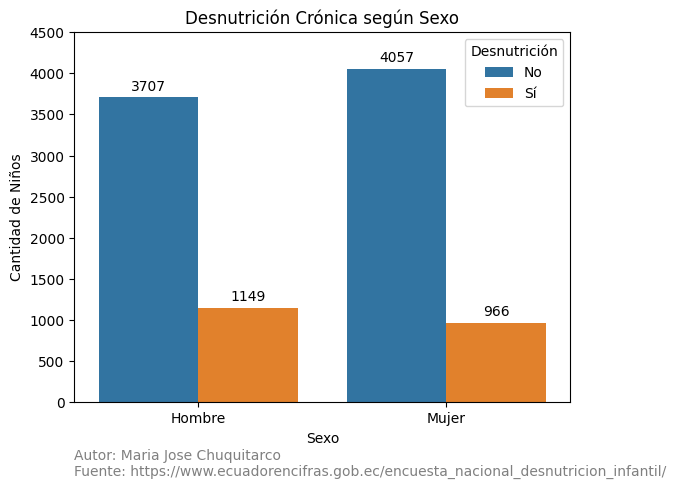

In [ ]:
# Crear el gráfico de barras
ax = sns.countplot(x='sexo', hue='dcronica', data=base_general)
plt.title('Desnutrición Crónica según Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Niños')
plt.ylim(0,4500)
plt.legend(title='Desnutrición', labels=['No', 'Sí'], loc='upper right', bbox_to_anchor=(1, 1))

# Añadir los números en cada barra
for p in ax.patches:
    # Obtener las coordenadas x y y de la barra
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Solo añadir texto si la altura es mayor que 0
    if height > 0:
        ax.text(x, height + 50, str(int(height)), ha='center', va='bottom', fontsize=10)

# Añadir el nombre del autor y la fuente
plt.text(-0.5, -700, 'Autor: Maria Jose Chuquitarco', fontsize=10, color='gray', ha='left')
plt.text(-0.5, -900, 'Fuente: https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/', fontsize=10, color='gray', ha='left')

plt.show()


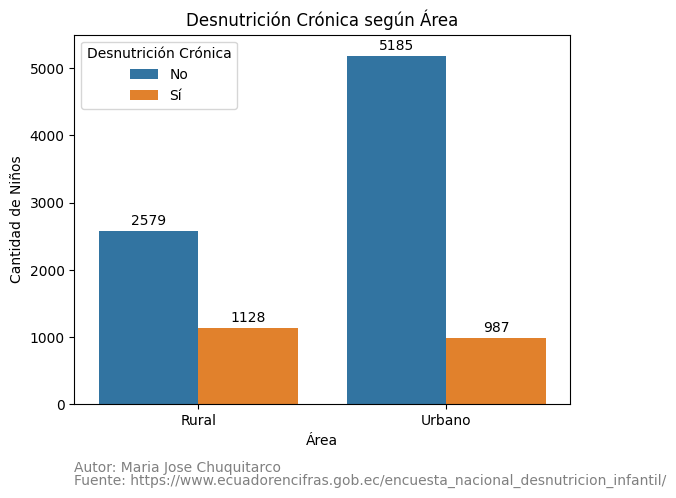

In [ ]:
# Crear el gráfico de barras
ax = sns.countplot(x='area_x', hue='dcronica', data=base_general)
plt.title('Desnutrición Crónica según Área')
plt.xlabel('Área')
plt.ylabel('Cantidad de Niños')
plt.ylim(0,5500)
plt.legend(title='Desnutrición Crónica', labels=['No', 'Sí'])

# Añadir los números en cada barra
for p in ax.patches:
    # Obtener las coordenadas x y y de la barra
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Solo añadir texto si la altura es mayor que 0
    if height > 0:
        ax.text(x, height + 50, str(int(height)), ha='center', va='bottom', fontsize=10)

# Añadir el nombre del autor y la fuente
plt.text(-0.5, -1000, 'Autor: Maria Jose Chuquitarco', fontsize=10, color='gray', ha='left')
plt.text(-0.5, -1200, 'Fuente: https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/', fontsize=10, color='gray', ha='left')

plt.show()



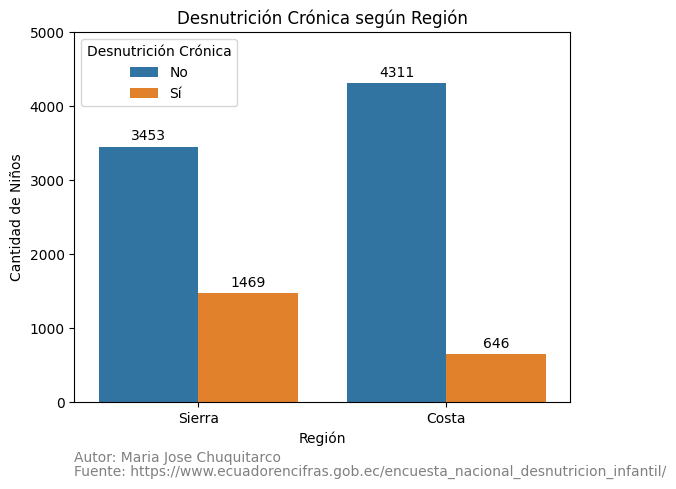

In [ ]:
# Crear el gráfico de barras
ax = sns.countplot(x='region', hue='dcronica', data=base_general)
plt.title('Desnutrición Crónica según Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Niños')
plt.ylim(0,5000)
plt.legend(title='Desnutrición Crónica', labels=['No', 'Sí'])

# Añadir los números en cada barra
for p in ax.patches:
    # Obtener las coordenadas x y y de la barra
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Solo añadir texto si la altura es mayor que 0
    if height > 0:
        ax.text(x, height + 50, str(int(height)), ha='center', va='bottom', fontsize=10)

# Añadir el nombre del autor y la fuente
plt.text(-0.5, -800, 'Autor: Maria Jose Chuquitarco', fontsize=10, color='gray', ha='left')
plt.text(-0.5, -1000, 'Fuente: https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/', fontsize=10, color='gray', ha='left')

plt.show()


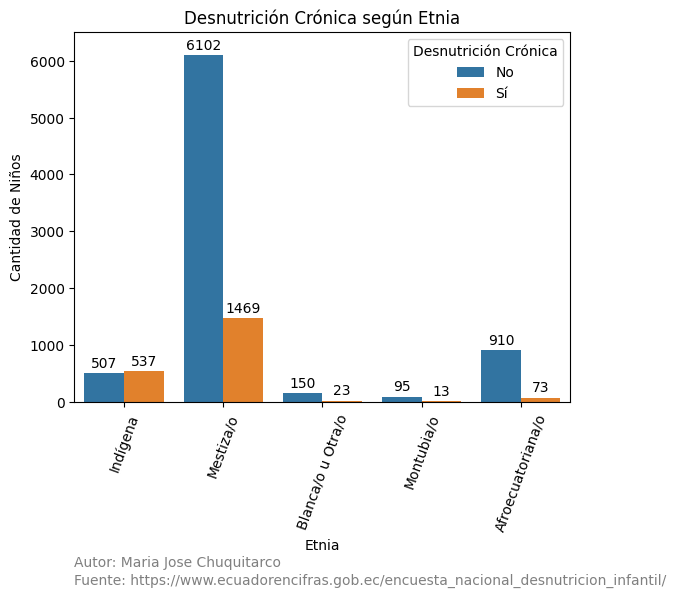

In [ ]:
# Crear el gráfico de barras
ax = sns.countplot(x='etnia', hue='dcronica', data=base_general)
plt.title('Desnutrición Crónica según Etnia')
plt.xlabel('Etnia')
plt.ylabel('Cantidad de Niños')
plt.ylim(0,6500)
plt.legend(title='Desnutrición Crónica', labels=['No', 'Sí'])
plt.xticks(rotation=70)  # Rotar etiquetas del eje x si es necesario

# Añadir los números en cada barra
for p in ax.patches:
    # Obtener las coordenadas x y de la barra
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Solo añadir texto si la altura es mayor que 0
    if height > 0:
        ax.text(x, height + 50, str(int(height)), ha='center', va='bottom', fontsize=10)

# Añadir el nombre del autor y la fuente
plt.text(-0.5, -2900, 'Autor: Maria Jose Chuquitarco', fontsize=10, color='gray', ha='left')
plt.text(-0.5, -3200, 'Fuente: https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/', fontsize=10, color='gray', ha='left')

plt.show()



In [ ]:
# Definir la función para calcular frecuencias y proporciones
def calcular_frecuencias_proporciones(df, variable_categ, variable_objetivo):
    tabla = pd.crosstab(df[variable_categ], df[variable_objetivo], margins=True, margins_name="Total")
    tabla_proporciones = tabla.div(tabla.loc['Total', 'Total'], axis=1) * 100
    return tabla, tabla_proporciones

# Variables categóricas
variables_categoricas = ['area_x', 'region', 'prov', 'parr_pri', 'etnia', 'sexo']

# Almacenar resultados
resultados = {}

for var in variables_categoricas:
    frecuencias, proporciones = calcular_frecuencias_proporciones(base_general, var, 'dcronica')
    resultados[var] = {'Frecuencias': frecuencias, 'Proporciones': proporciones}

# Mostrar frecuencias y proporciones en el notebook
for var in variables_categoricas:
    print(f'Frecuencias de Desnutrición Crónica según {var}')
    display(resultados[var]['Frecuencias'])
    print(f'Proporciones de Desnutrición Crónica según {var}')
    display(resultados[var]['Proporciones'])


Frecuencias de Desnutrición Crónica según area_x


dcronica,0,1,Total
area_x,,,
Rural,2579,1128,3707
Urbano,5185,987,6172
Total,7764,2115,9879


Proporciones de Desnutrición Crónica según area_x


dcronica,0,1,Total
area_x,,,
Rural,26.105881,11.418160,37.524041
Urbano,52.485069,9.990890,62.475959
Total,78.590951,21.409049,100.000000


Frecuencias de Desnutrición Crónica según region


dcronica,0,1,Total
region,,,
Costa,4311,646,4957
Sierra,3453,1469,4922
Total,7764,2115,9879


Proporciones de Desnutrición Crónica según region


dcronica,0,1,Total
region,,,
Costa,43.638020,6.539123,50.177143
Sierra,34.952930,14.869926,49.822857
Total,78.590951,21.409049,100.000000


Frecuencias de Desnutrición Crónica según prov


dcronica,0,1,Total
prov,,,
Azuay,939,267,1206
Bolívar,554,290,844
Carchi,461,154,615
Cañar,614,293,907
Chimborazo,506,318,824
Cotopaxi,379,147,526
El Oro,1493,259,1752
Esmeraldas,1466,147,1613
Guayas,1352,240,1592


Proporciones de Desnutrición Crónica según prov


dcronica,0,1,Total
prov,,,
Azuay,9.505011,2.702703,12.207713
Bolívar,5.607855,2.935520,8.543375
Carchi,4.666464,1.558862,6.225326
Cañar,6.215204,2.965887,9.181091
Chimborazo,5.121976,3.218949,8.340925
Cotopaxi,3.836421,1.488005,5.324426
El Oro,15.112866,2.621723,17.734589
Esmeraldas,14.839559,1.488005,16.327564
Guayas,13.685596,2.429396,16.114991


Frecuencias de Desnutrición Crónica según parr_pri


dcronica,0,1,Total
parr_pri,,,
No priorizadas,4504,985,5489
Priorizadas,3260,1130,4390
Total,7764,2115,9879


Proporciones de Desnutrición Crónica según parr_pri


dcronica,0,1,Total
parr_pri,,,
No priorizadas,45.591659,9.970645,55.562304
Priorizadas,32.999291,11.438405,44.437696
Total,78.590951,21.409049,100.000000


Frecuencias de Desnutrición Crónica según etnia


dcronica,0,1,Total
etnia,,,
Afroecuatoriana/o,910,73,983
Blanca/o u Otra/o,150,23,173
Indígena,507,537,1044
Mestiza/o,6102,1469,7571
Montubia/o,95,13,108
Total,7764,2115,9879


Proporciones de Desnutrición Crónica según etnia


dcronica,0,1,Total
etnia,,,
Afroecuatoriana/o,9.211459,0.738941,9.950400
Blanca/o u Otra/o,1.518372,0.232817,1.751189
Indígena,5.132098,5.435773,10.567871
Mestiza/o,61.767385,14.869926,76.637311
Montubia/o,0.961636,0.131592,1.093228
Total,78.590951,21.409049,100.000000


Frecuencias de Desnutrición Crónica según sexo


dcronica,0,1,Total
sexo,,,
Hombre,3707,1149,4856
Mujer,4057,966,5023
Total,7764,2115,9879


Proporciones de Desnutrición Crónica según sexo


dcronica,0,1,Total
sexo,,,
Hombre,37.524041,11.630732,49.154773
Mujer,41.066910,9.778318,50.845227
Total,78.590951,21.409049,100.000000


####3.Analisis de correlación

Codificación de Variables Categóricas

In [ ]:
# Iterar sobre las columnas categóricas
for col in categorical_cols:
    # Obtener las opciones únicas para la columna actual
    opciones_unicas = base_general[col].unique()

    # Crear un diccionario para mapear las opciones a números
    mapping = {opcion: i for i, opcion in enumerate(opciones_unicas, 1)}

    # Aplicar el mapeo a la columna
    base_general[col] = base_general[col].map(mapping)

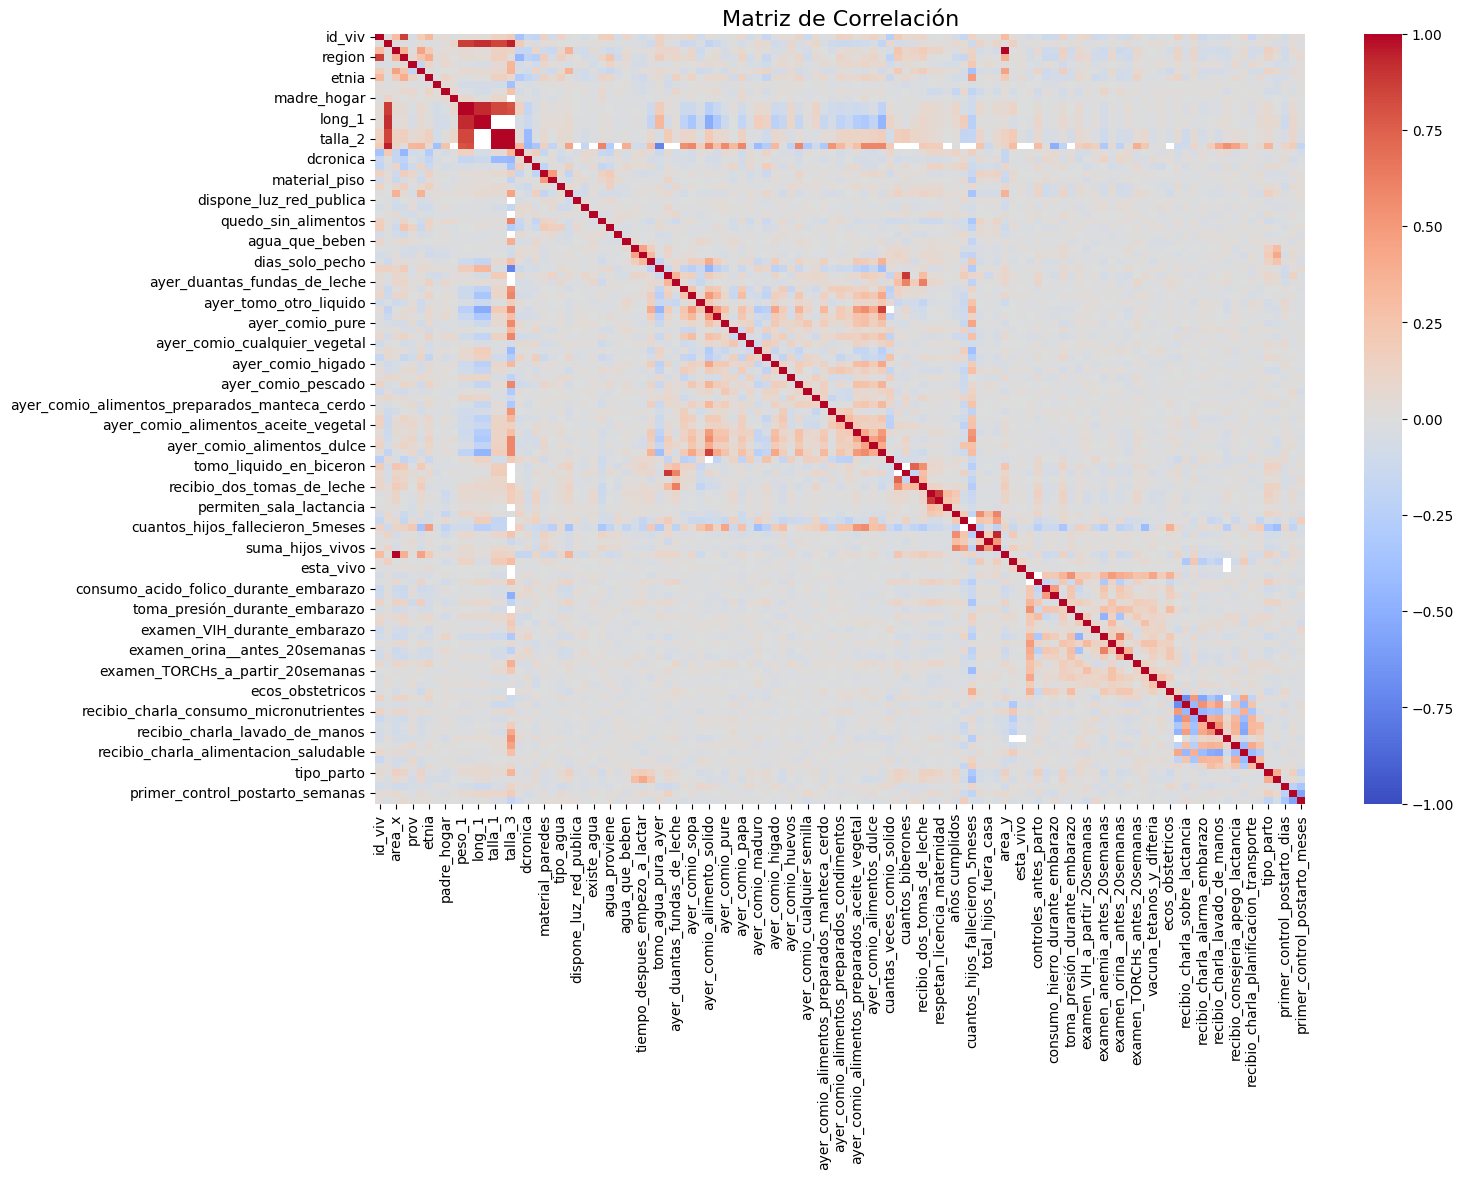

In [ ]:
# Calcular la matriz de correlación
correlacion = base_general.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear el heatmap
sns.heatmap(correlacion, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Matriz de Correlación', fontsize=16)

# Mostrar el gráfico
plt.show()


Filtrar solo las filas que tenga valor en la variable categorica dcronica

In [ ]:
base_general= base_general.dropna(subset=['dcronica'])

##3. Creación de los conjuntos de validación

In [ ]:
# Separar las variables predictoras (features) y la variable objetivo (target)
X = base_general.drop(columns=['dcronica'])
y = base_general['dcronica']
# Dividir el DataFrame en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Verificar el tamaño de cada DataFrame y Series
print("Tamaño de base_general_encoded:")
print(f"Filas: {base_general.shape[0]}, Columnas: {base_general.shape[1]}")

print("\nTamaño de X_train:")
print(f"Filas: {X_train.shape[0]}, Columnas: {X_train.shape[1]}")

print("\nTamaño de X_test:")
print(f"Filas: {X_test.shape[0]}, Columnas: {X_test.shape[1]}")

# Tamaño de y_train
print("\nTamaño de y_train:")
print(f"Filas: {y_train.shape[0]}")

# Tamaño de y_test
print("\nTamaño de y_test:")
print(f"Filas: {y_test.shape[0]}")


Tamaño de base_general_encoded:
Filas: 9879, Columnas: 113

Tamaño de X_train:
Filas: 7903, Columnas: 112

Tamaño de X_test:
Filas: 1976, Columnas: 112

Tamaño de y_train:
Filas: 7903

Tamaño de y_test:
Filas: 1976


##4. Selección, preprocesamiento y transformación

###4.1. Tratamiento de valores nulos

In [ ]:
# Verificar qué columnas tienen valores nulos y cuántos
nulos = X_train.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
nulos = nulos[nulos > 0]

# Mostrar las columnas con valores nulos y el conteo
print("Valores nulos por columna X_train:")
print(nulos)

nulos1 = X_test.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
nulos1 = nulos1[nulos1 > 0]

# Mostrar las columnas con valores nulos y el conteo
print("Valores nulos por columna X_test:")
print(nulos1)


Valores nulos por columna X_train:
long_1                              3553
long_2                              3553
talla_1                             4350
talla_2                             4350
talla_3                             7889
hemoglobina                         1161
ayer_cuantos_tarros_de_leche        6231
ayer_duantas_fundas_de_leche        6306
cuantas_veces_comio_solido          1201
cuantos_biberones                   5575
hijos_vivos_que_murieron            7644
cuantos_hijos_fallecieron_5meses    7716
controles_antes_parto                108
cuantos_nacidos_vivos               5464
primer_control_postarto_dias        3759
primer_control_postarto_semanas     3759
primer_control_postarto_meses       3759
dtype: int64
Valores nulos por columna X_test:
long_1                               884
long_2                               884
talla_1                             1092
talla_2                             1092
talla_3                             1971
hemoglobina     

In [ ]:
# Seleccionar solo columnas numéricas para la imputación
numeric_cols = ['peso_1','peso_2','long_1','long_2','talla_1','talla_2','talla_3','hemoglobina',
'dias_solo_pecho','ayer_cuantos_tarros_de_leche','ayer_duantas_fundas_de_leche','cuantas_veces_comio_solido','cuantos_biberones',
'años cumplidos','hijos_vivos_que_murieron','cuantos_hijos_fallecieron_5meses','total_hijos_viven_casa','total_hijos_fuera_casa','suma_hijos_vivos',
'controles_antes_parto','primer_control_postarto_dias','primer_control_postarto_semanas','primer_control_postarto_meses', 'cuantos_nacidos_vivos']

# Crear el imputador
imputer = SimpleImputer(strategy='mean')

# Imputar valores nulos en X_train y X_test
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])


In [ ]:
# Verificar qué columnas tienen valores nulos y cuántos
nulos = X_train.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
nulos = nulos[nulos > 0]

# Mostrar las columnas con valores nulos y el conteo
print("Valores nulos por columna X_train:")
print(nulos)

nulos1 = X_test.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
nulos1 = nulos1[nulos1 > 0]

# Mostrar las columnas con valores nulos y el conteo
print("Valores nulos por columna X_test:")
print(nulos1)


Valores nulos por columna X_train:
Series([], dtype: int64)
Valores nulos por columna X_test:
Series([], dtype: int64)


###4.2. Tratamiento de valores atipicos

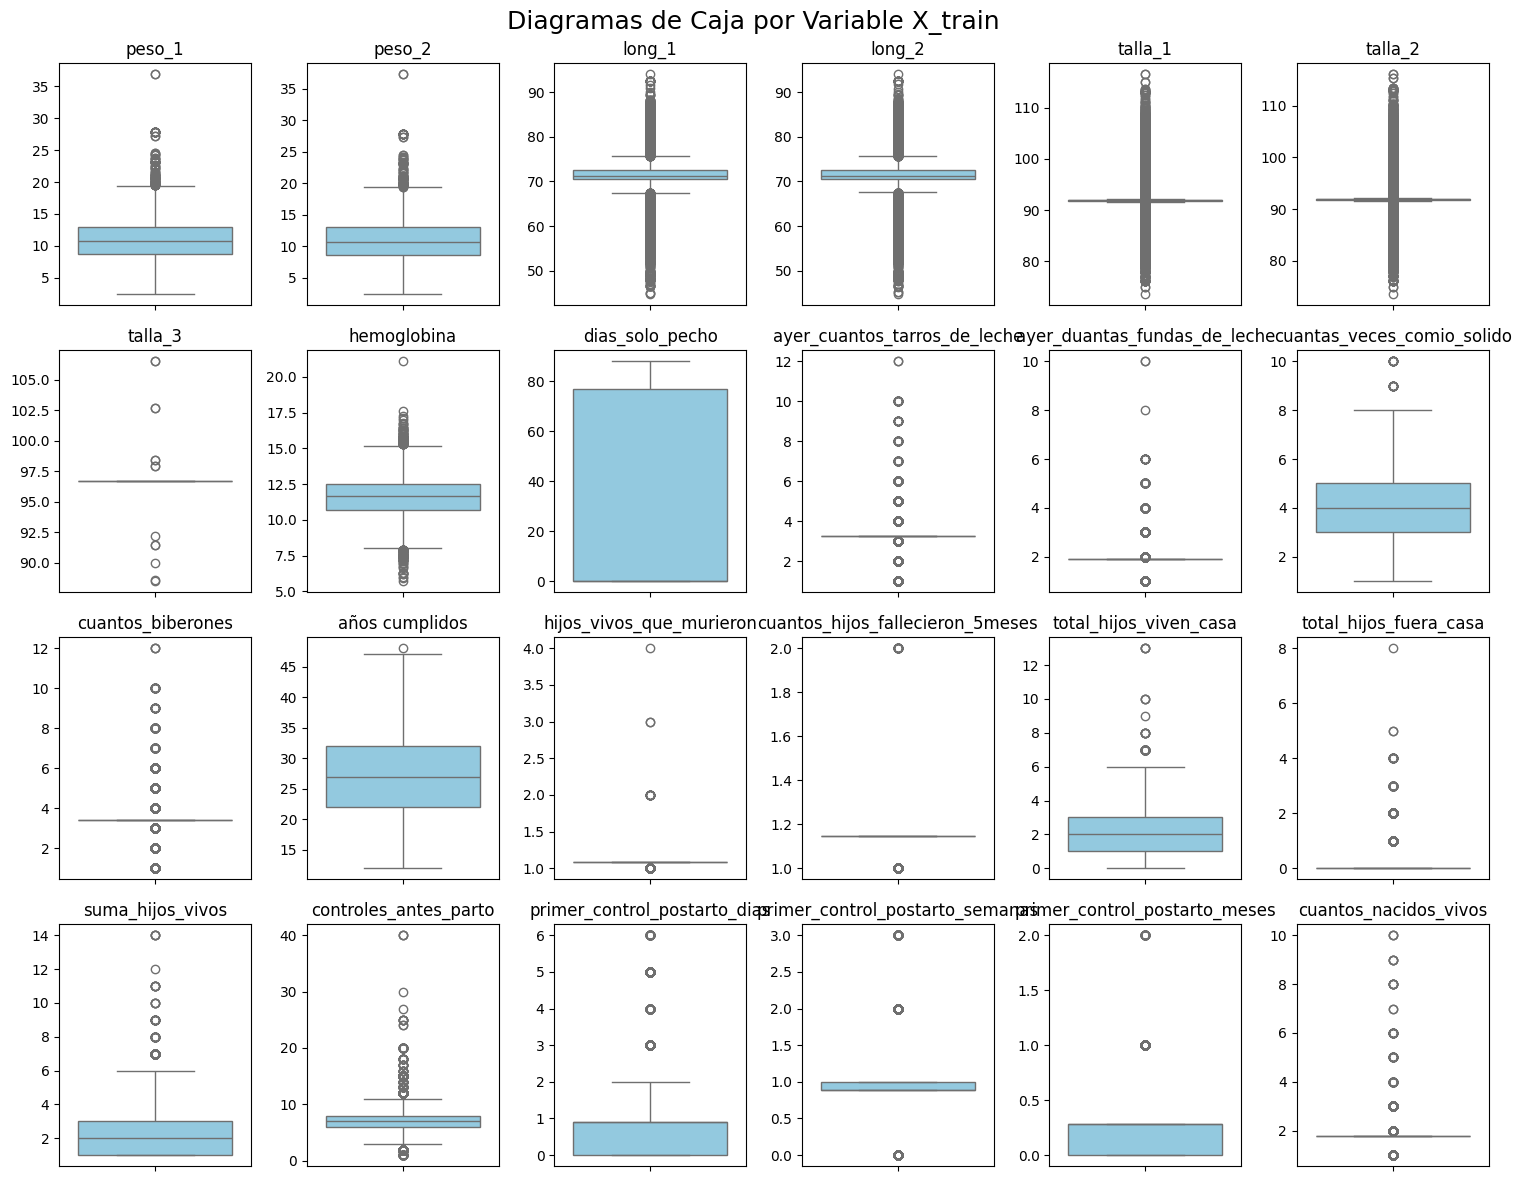

In [ ]:
# Crear diagramas de caja para cada variable
plt.figure(figsize=(15, 12))  # Ajusta el tamaño de la figura según tus necesidades
n_vars = len(numeric_cols)
n_cols = 6  # Número de columnas en la cuadrícula
n_rows = (n_vars // n_cols) + int(n_vars % n_cols != 0)  # Número de filas

plt.suptitle('Diagramas de Caja por Variable X_train', fontsize=18)

for i, variable in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear subplots
    sns.boxplot(y=X_train[variable], color='skyblue')
    plt.title(variable)
    plt.xlabel('')  # Opcional: si quieres quitar la etiqueta del eje x
    plt.ylabel('')  # Opcional: si quieres quitar la etiqueta del eje y

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


In [ ]:
# Calcula el rango intercuartílico (IQR) para cada columna numérica
cols=X_train[numeric_cols]
Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

# Define límites para identificar valores atípicos para cada columna
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encuentra valores atípicos para cada columna
valores_atipicos_por_columna = ((cols < limite_inferior) | (cols> limite_superior)).sum()

# Muestra la cantidad de valores atípicos por columna
print("Cantidad de valores atípicos por variable:")
print(valores_atipicos_por_columna)

Cantidad de valores atípicos por variable:
peso_1                                92
peso_2                                89
long_1                              2754
long_2                              2809
talla_1                             3446
talla_2                             3438
talla_3                               14
hemoglobina                          169
dias_solo_pecho                        0
ayer_cuantos_tarros_de_leche        1672
ayer_duantas_fundas_de_leche        1597
cuantas_veces_comio_solido            24
cuantos_biberones                   2328
años cumplidos                         1
hijos_vivos_que_murieron             259
cuantos_hijos_fallecieron_5meses     187
total_hijos_viven_casa                75
total_hijos_fuera_casa               602
suma_hijos_vivos                     167
controles_antes_parto                628
primer_control_postarto_dias         622
primer_control_postarto_semanas     2594
primer_control_postarto_meses       1123
cuantos_nacido

In [ ]:
# Seleccionar las columnas numéricas con valores atípicos
columnas_con_atipicos = valores_atipicos_por_columna[valores_atipicos_por_columna > 0].index.tolist()

# Aplicar winsorización a las columnas con valores atípicos
for col in columnas_con_atipicos:
    # Aplicar winsorización solo si la columna no es "weekofyear"
    if col != "weekofyear":
        X_train[col] = winsorize(X_train[col], limits=[0.05, 0.05])

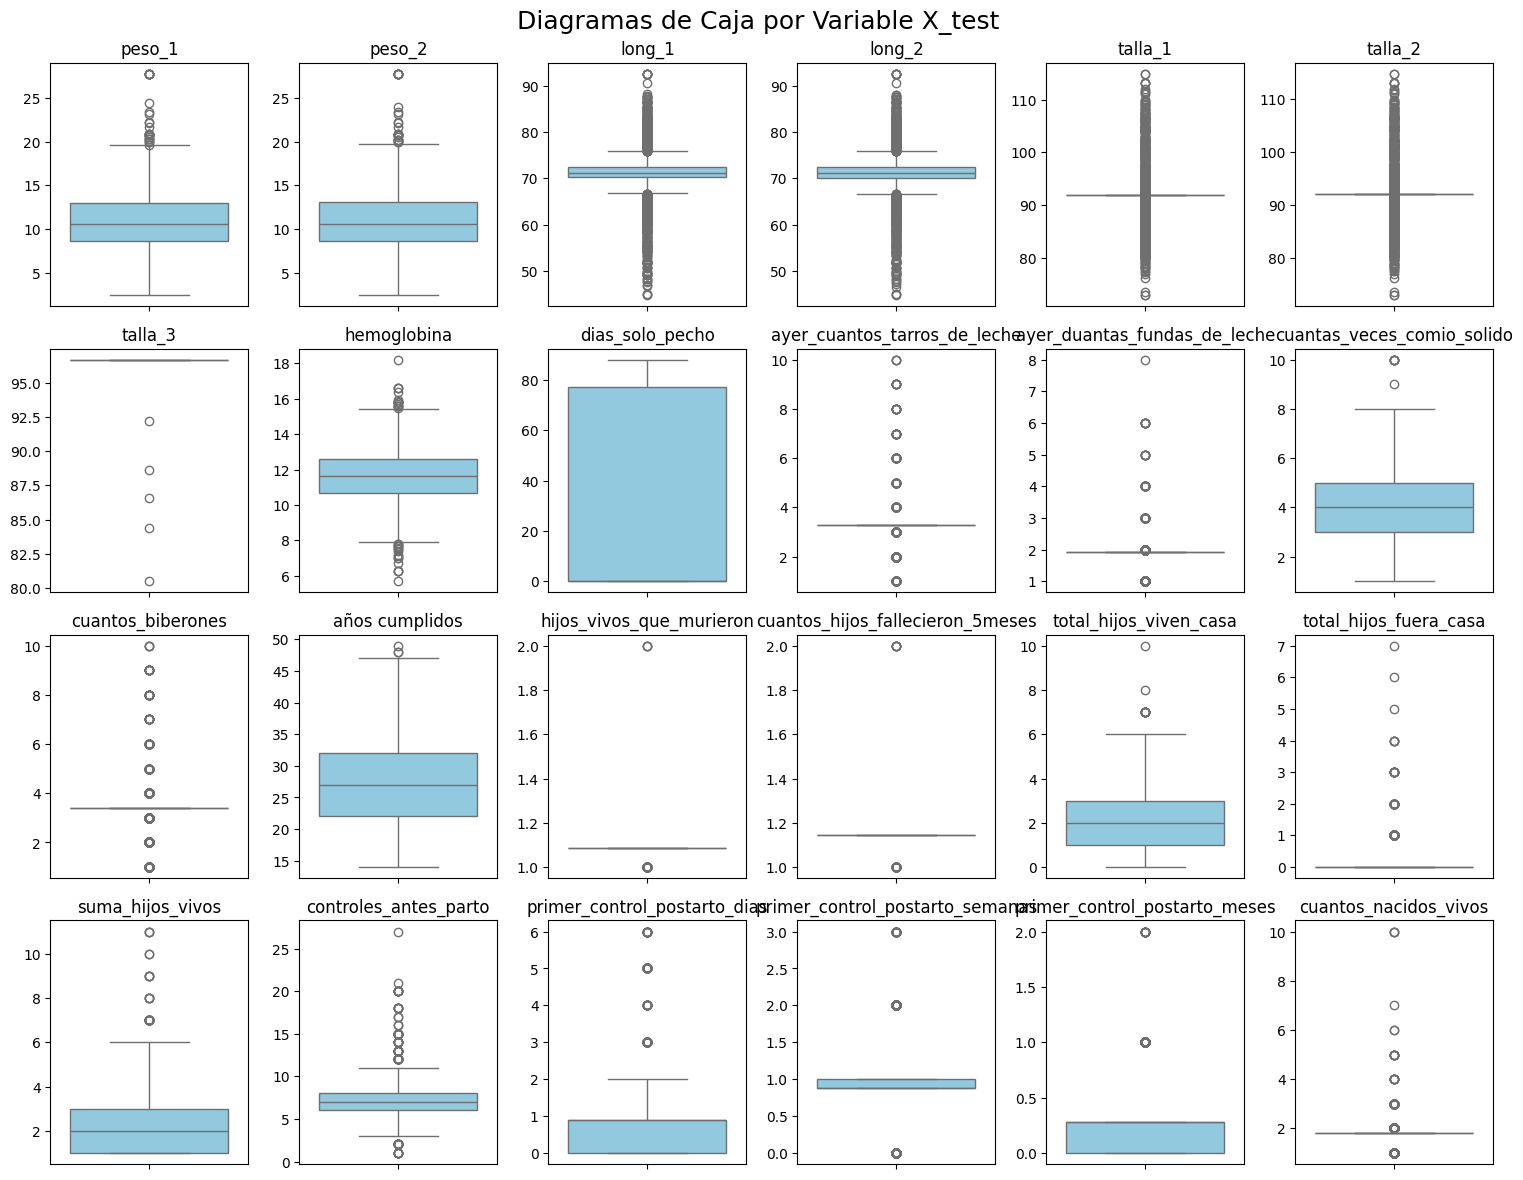

In [ ]:
plt.figure(figsize=(15, 12))  # Ajusta el tamaño de la figura según tus necesidades
n_vars = len(numeric_cols)
n_cols = 6 # Número de columnas en la cuadrícula
n_rows = (n_vars // n_cols) + int(n_vars % n_cols != 0)  # Número de filas
plt.suptitle('Diagramas de Caja por Variable X_test', fontsize=18)
for i, variable in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Crear subplots
    sns.boxplot(y=X_test[variable], color='skyblue')
    plt.title(variable)
    plt.xlabel('')  # Opcional: si quieres quitar la etiqueta del eje x
    plt.ylabel('')  # Opcional: si quieres quitar la etiqueta del eje y

plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


In [ ]:
# Calcula el rango intercuartílico (IQR) para cada columna numérica
cols=X_test[numeric_cols]
Q1 = cols.quantile(0.25)
Q3 = cols.quantile(0.75)
IQR = Q3 - Q1

# Define límites para identificar valores atípicos para cada columna
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encuentra valores atípicos para cada columna
valores_atipicos_por_columna = ((cols < limite_inferior) | (cols> limite_superior)).sum()

# Muestra la cantidad de valores atípicos por columna
print("Cantidad de valores atípicos por variable:")
print(valores_atipicos_por_columna)

Cantidad de valores atípicos por variable:
peso_1                               30
peso_2                               29
long_1                              669
long_2                              665
talla_1                             884
talla_2                             884
talla_3                               5
hemoglobina                          37
dias_solo_pecho                       0
ayer_cuantos_tarros_de_leche        418
ayer_duantas_fundas_de_leche        392
cuantas_veces_comio_solido            7
cuantos_biberones                   609
años cumplidos                        3
hijos_vivos_que_murieron             74
cuantos_hijos_fallecieron_5meses     59
total_hijos_viven_casa               15
total_hijos_fuera_casa              156
suma_hijos_vivos                     44
controles_antes_parto               130
primer_control_postarto_dias        173
primer_control_postarto_semanas     649
primer_control_postarto_meses       266
cuantos_nacidos_vivos               6

In [ ]:
# Seleccionar las columnas numéricas con valores atípicos
columnas_con_atipicos = valores_atipicos_por_columna[valores_atipicos_por_columna > 0].index.tolist()

# Aplicar winsorización a las columnas con valores atípicos
for col in columnas_con_atipicos:
    # Aplicar winsorización solo si la columna no es "weekofyear"
    if col != "weekofyear":
        X_test[col] = winsorize(X_test[col], limits=[0.05, 0.05])

###4.3. Tratamiento de datos para abordar el problema de desbalanceo de clases (Oversampling)



Aplicar SMOTE para balancear las clases. El objetivo es aumentar el número de instancias de la clase minoritaria (1) hasta un número más cercano a la clase mayoritaria (0).

Distribución de clases antes del balanceo: Counter({'0': 6211, '1': 1692})
Distribución de clases después del balanceo: Counter({'0': 6211, '1': 6211})


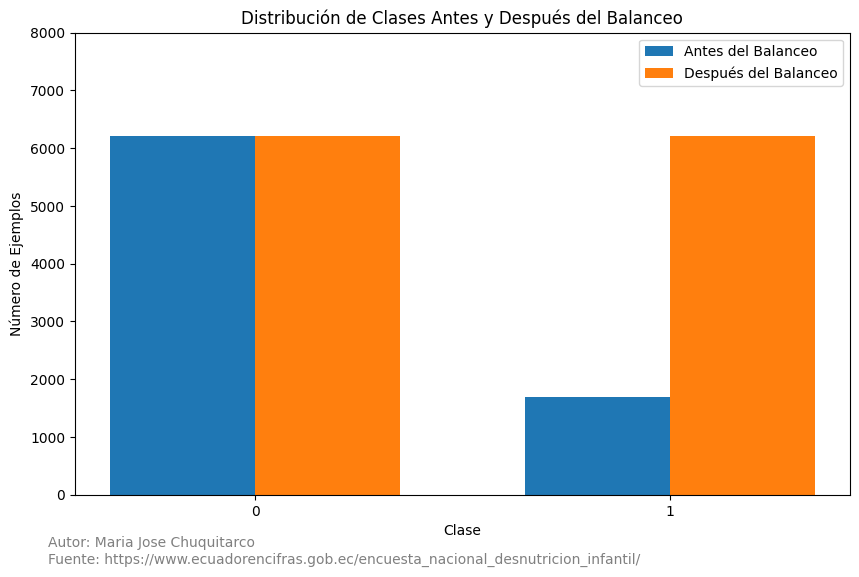

In [ ]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Distribución de clases antes del balanceo
before_resample = Counter(y_train)
print("Distribución de clases antes del balanceo:", before_resample)

# Distribución de clases después del balanceo
after_resample = Counter(y_train_res)
print("Distribución de clases después del balanceo:", after_resample)

# Convertir los datos a listas para graficar
labels = sorted(set(before_resample.keys()).union(after_resample.keys()))
before_counts = [before_resample.get(label, 0) for label in labels]
after_counts = [after_resample.get(label, 0) for label in labels]

# Crear gráfico de barras sin cuadrícula y con colores por defecto
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(labels))  # Ubicación en el eje x
width = 0.35  # Ancho de las barras

# Añadir barras para 'Antes del Balanceo' y 'Después del Balanceo'
bars_before = ax.bar(x - width/2, before_counts, width, label='Antes del Balanceo')
bars_after = ax.bar(x + width/2, after_counts, width, label='Después del Balanceo')

# Añadir etiquetas y título
ax.set_xlabel('Clase')
ax.set_ylabel('Número de Ejemplos')
ax.set_title('Distribución de Clases Antes y Después del Balanceo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(0,8000)
ax.legend()

# Quitar la cuadrícula
ax.grid(False)
# Añadir el nombre del autor y la fuente
plt.text(-0.5, -900, 'Autor: Maria Jose Chuquitarco', fontsize=10, color='gray', ha='left')
plt.text(-0.5, -1200, 'Fuente: https://www.ecuadorencifras.gob.ec/encuesta_nacional_desnutricion_infantil/', fontsize=10, color='gray', ha='left')


plt.show()

###4.4. Tratamiento de variables

####4.4.1. Analisis de Componentes Especiales (ACP)

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


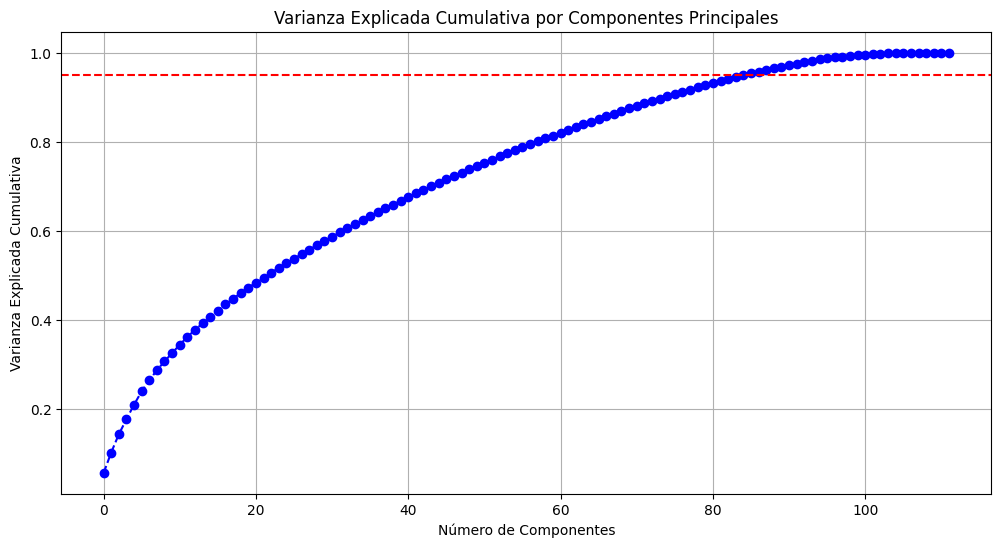

In [ ]:
# Ajustar PCA con todos los componentes
pca_full = PCA()
X_train_scaled = StandardScaler().fit_transform(X_train)  # Escalar los datos
pca_full.fit(X_train_scaled)

# Obtener la varianza explicada y la varianza acumulativa
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--')  # Línea horizontal en el 95% de varianza explicada
plt.title('Varianza Explicada Cumulativa por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Cumulativa')
plt.grid(True)
plt.show()


In [ ]:
#Reducción de dimensionalidad con PCA
pca = PCA(n_components=80)

# Ajustar PCA en los datos estandarizados del conjunto de entrenamiento
X_train = pca.fit_transform(X_train_scaled)

# Transformar el conjunto de prueba con el mismo PCA
X_test= pca.transform(X_test_scaled)

Varianza Explicada Cumulativa: 92.75093110012322


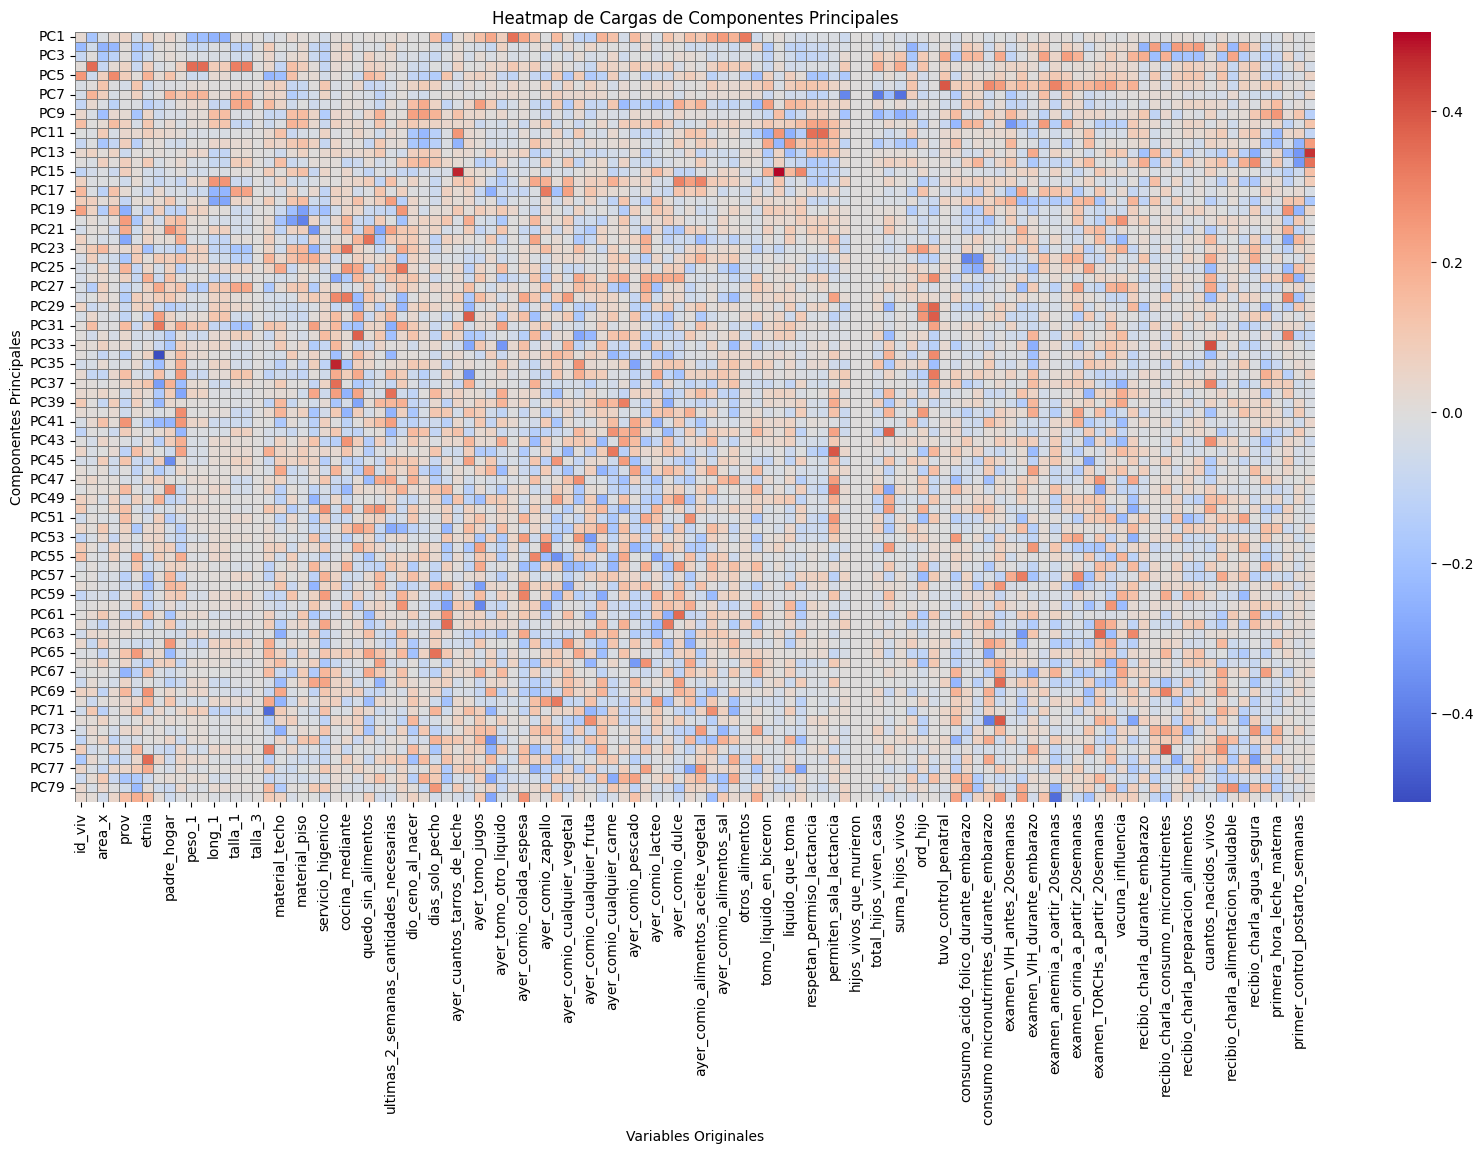

In [ ]:
# Extraer el modelo PCA
modelo_pca = pca
# Crear un DataFrame con las cargas de los componentes principales
componentes_df = pd.DataFrame(
    data=modelo_pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(modelo_pca.n_components_)]
)

# Obtener la varianza explicada por cada componente
varianza_explicada = modelo_pca.explained_variance_ratio_ * 100
# Imprimir el número de componentes y la varianza explicada
print(f'Varianza Explicada Cumulativa: {sum(varianza_explicada)}')


# Crear un heatmap con las cargas de los componentes principales
plt.figure(figsize=(20, 10))
sns.heatmap(componentes_df, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5, linecolor='gray')
plt.title('Heatmap de Cargas de Componentes Principales')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.show()


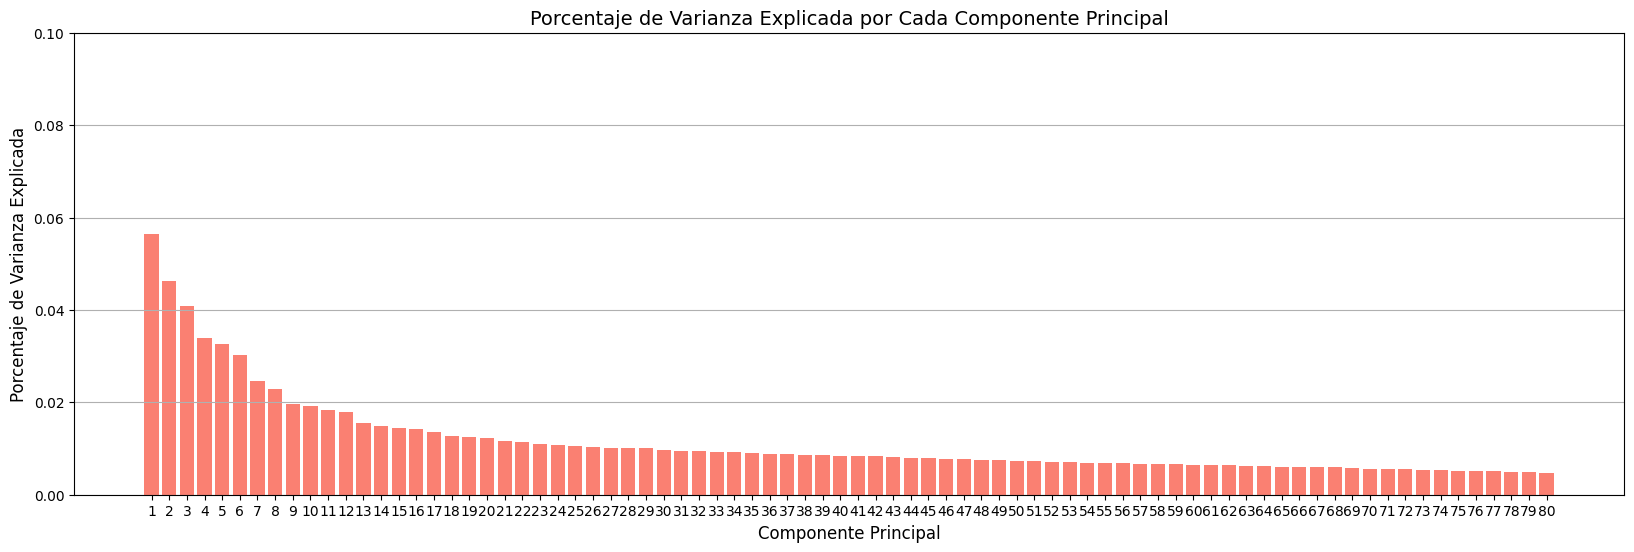

In [ ]:
# Crear el gráfico de barras para la varianza explicada
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_,
    color='salmon'  # Color salmón fuerte para las barras
)

# Configurar el gráfico
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)  # Mostrar solo números
ax.set_ylim(0, 0.1)
ax.set_title('Porcentaje de Varianza Explicada por Cada Componente Principal', fontsize=14)
ax.set_xlabel('Componente Principal', fontsize=12)
ax.set_ylabel('Porcentaje de Varianza Explicada', fontsize=12)
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()


##5. Mineria de datos

###5.1. Aprendizaje Supervisado

####5.1.1. Regresión Logistica

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetros de regularización
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']  # Algoritmos de optimización
}


In [ ]:
# Crear el clasificador de Regresión Logística
model_logistic = LogisticRegression(max_iter=1000)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model_logistic,
                           param_grid=param_grid,
                           cv=5,  # Número de folds en la validación cruzada
                           scoring='accuracy',  # Cambia esta métrica si lo deseas
                           n_jobs=-1,  # Usa todos los núcleos disponibles
                           verbose=1)  # Muestra el progreso

# Ajustar GridSearchCV en el conjunto de datos
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga']},
             scoring='accuracy', verbose=1)

In [ ]:
# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)


Mejores parámetros: {'C': 1, 'solver': 'liblinear'}
Mejor puntuación de validación cruzada: 0.806909903201787


El accuracy de prueba es la proporción de predicciones correctas que realizó el modelo sobre el conjunto de datos de prueba. En este caso, es 0.8069, lo que significa que el 80% de las veces el modelo clasificó correctamente las observaciones de prueba.

In [ ]:
best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(X_test)

####5.1.2. Random Forest

In [ ]:
param_grid1 = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt'],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

In [ ]:
# Crear el clasificador de Random Forest
model_rf = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
# Configurar GridSearchCV
grid_search1 = GridSearchCV(
    estimator=model_rf,
    param_grid=param_grid1,
    cv=3,
    n_jobs=-1,  # Utilizar todos los núcleos disponibles
    verbose=2,
    scoring='accuracy'
)
# Ajustar GridSearchCV en el conjunto de datos
grid_search1.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [ ]:
# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros:", grid_search1.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search1.best_score_)


Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación de validación cruzada: 0.8398068944186782


In [ ]:
# Hacer predicciones en el conjunto de prueba
best_rf = grid_search1.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Obtener las probabilidades de predicción para la curva ROC
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]


##6. Validación de los resultados

###6.1. Aprendizaje Supervisado

####6.1.1. Regresion Logistica

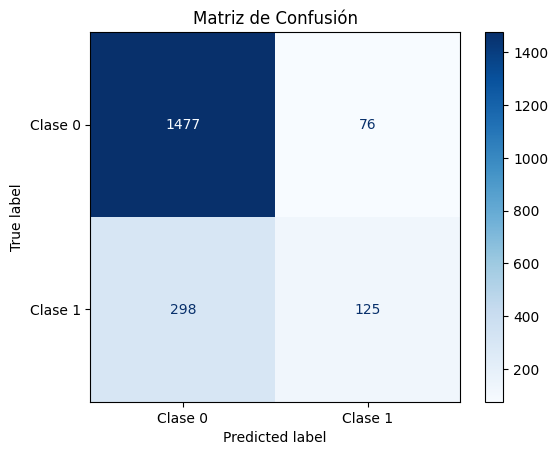

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(cm)

[[1477   76]
 [ 298  125]]


In [ ]:
# Generar el informe de clasificación
report = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(report)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1553
           1       0.62      0.30      0.40       423

    accuracy                           0.81      1976
   macro avg       0.73      0.62      0.64      1976
weighted avg       0.79      0.81      0.78      1976



El modelo tiene un buen rendimiento en la predicción de la clase 0, con alta precisión y recall. La clase 1 tiene un recall bajo, lo que indica que el modelo tiene dificultades para identificar correctamente los casos de esta clase.
La exactitud general del modelo es buena (81%), pero la F1-score baja para la clase 1 sugiere que podría ser necesario mejorar el modelo para manejar mejor la clase minoritaria o desbalanceada.




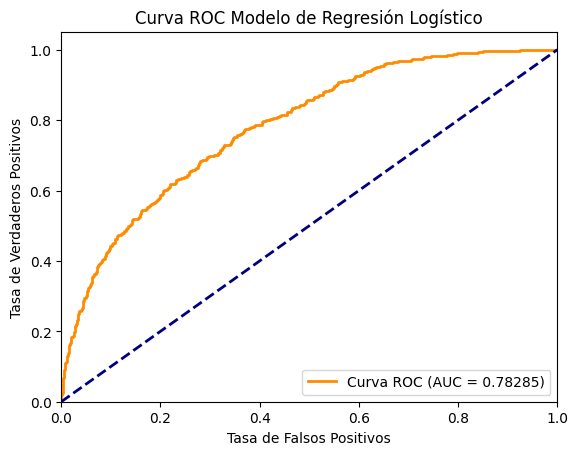

In [ ]:
#CURVA ROC
# Convertir etiquetas de y_test a enteros
y_test_int = y_test.astype(int)

# Hacer predicciones en probabilidades
y_prob = best_lr.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_int, y_prob)
roc_auc = roc_auc_score(y_test_int, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Modelo de Regresión Logístico')
plt.legend(loc='lower right')
plt.show()



Una curva ROC (Receiver Operating Characteristic) con un área bajo la curva (AUC) de 0.78285 indica que el modelo tiene una capacidad de discriminación razonablemente buena entre las clases positivas y negativas

In [ ]:
# Validación cruzada
cv_scores_logistic = cross_val_score(model_logistic, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Puntuaciones de la validación cruzada para Regresión Logística: {cv_scores_logistic}')
print(f'Precisión media: {cv_scores_logistic.mean()}')
print(f'Precisión desviación estándar: {cv_scores_logistic.std()}')

Puntuaciones de la validación cruzada para Regresión Logística: [0.84187223 0.84376977 0.84756483 0.85886076 0.85759494]
Precisión media: 0.8499325054644153
Precisión desviación estándar: 0.007028225984821033


Puntuaciones de Validación Cruzada: Estas son las precisiones obtenidas en cada una de las 5 particiones del conjunto de datos durante la validación cruzada. Muestran cómo varía el rendimiento del modelo en diferentes subconjuntos de datos.

Precisión Media: Es la media de las puntuaciones obtenidas en las particiones. Un valor de 0.8499 indica que el modelo, en promedio, tiene una precisión de aproximadamente 84.99%.

Precisión Desviación Estándar: Es una medida de la variabilidad de las puntuaciones de validación cruzada. Una desviación estándar de 0.0070 indica que las puntuaciones son bastante consistentes entre las diferentes particiones del conjunto de datos.

Tiene problemas significativos con la clasificación de la clase minoritaria (1), reflejado en su baja precisión y recall para esta clase. Es posible que necesites ajustar los parámetros del modelo o aplicar técnicas de balanceo de clases (como sobremuestreo o submuestreo) para mejorar la capacidad del modelo para identificar correctamente la clase minoritaria.

####6.1.2. Random Forest

Matriz de Confusión:
[[1527   26]
 [ 288  135]]


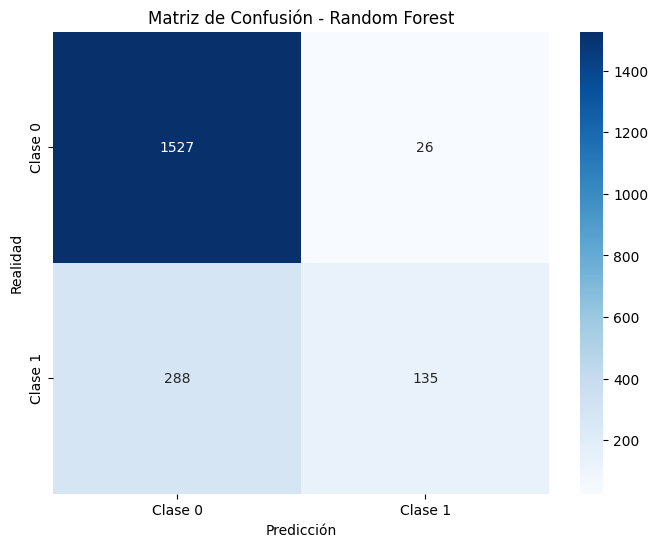

In [ ]:
# Calcular y mostrar la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusión:")
print(cm_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Random Forest')
plt.show()


In [ ]:
# Generar el informe de clasificación
report_rf = classification_report(y_test, y_pred_rf)
print("Informe de Clasificación:")
print(report_rf)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1553
           1       0.84      0.32      0.46       423

    accuracy                           0.84      1976
   macro avg       0.84      0.65      0.68      1976
weighted avg       0.84      0.84      0.81      1976



El modelo presenta un rendimiento destacado en la detección de la clase 0, obteniendo una alta precisión y recall. En cambio el rendimiento para la clase 1 es menos sólido, mostrando un bajo recall y una puntuación F1 que indica posibles dificultades del modelo en la correcta identificación de casos de la clase 1.
El modelo muestra un alto nivel de precisión general (84%), lo que significa que, en promedio, sus predicciones son acertadas, además el hecho de que las métricas de precisión y recall sean significativamente diferentes para las dos clases podría indicar un posible desequilibrio en los datos, con la clase 1 presentando una representación inferior.
.

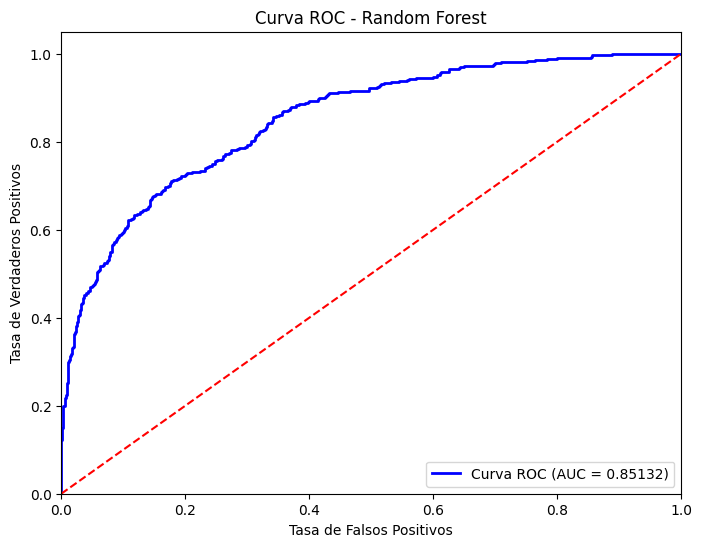

In [ ]:
# Calcular la curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_int, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Curva ROC (AUC = %0.5f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()


A pesar de tener un AUC de 0.85132. Basándose en el informe de clasificación,  sugiere que el modelo es capaz de discriminar eficientemente entre las clases, se observa un bajo recuerdo (0.32) para la clase 1. Esto implica que, aunque el modelo tiene un desempeño generalmente bueno al diferenciar entre las clases, presenta dificultades para identificar correctamente los casos pertenecientes a la clase minoritaria (clase 1).

In [ ]:
# Validación cruzada
cv_scores_rf = cross_val_score(model_rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Imprimir resultados
print(f'Puntuaciones de la validación cruzada para Random Forest: {cv_scores_rf}')
print(f'Precisión media: {cv_scores_rf.mean()}')
print(f'Precisión desviación estándar: {cv_scores_rf.std()}')

Puntuaciones de la validación cruzada para Random Forest: [0.91081594 0.9082859  0.91271347 0.91835443 0.91265823]
Precisión media: 0.9125655929991433
Precisión desviación estándar: 0.003314157233877438


La baja desviación estándar indica que el rendimiento del modelo es estable, lo cual es favorable para su capacidad de generalizar en datos no conocidos.
A pesar de tener una precisión promedio del 91%, el modelo muestra solidez en la clasificación. Sin embargo, debes tener en cuenta que mejorar la tasa de recuperación para la clase 1 sigue siendo un desafío pendiente, el cual podrías abordar mediante ajustes a los hiperparámetros o al umbral utilizado para categorizar.


In [ ]:
file_path = "base_general.xlsx"
base_general.to_excel(file_path, index=False)
